In [117]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import optimizers
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import ReduceLROnPlateau,CSVLogger, EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
from numpy.random import seed
seed(1)

In [118]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [119]:
y_train.shape


(60000,)

In [120]:
X_train.shape

(60000, 28, 28)

In [121]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [122]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [123]:
X_train/=255
X_test/=255

In [124]:
X_validation = X_train[50000:][:]
X_train = X_train[:50000][:]

In [125]:
num_classes=10

In [126]:
X_train.shape

(50000, 784)

In [127]:
X_validation.shape

(10000, 784)

In [128]:
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [129]:
Y_train.shape

(60000, 10)

In [130]:
Y_validation.shape

(10000, 10)

In [131]:
Y_validation = Y_train[50000:][:]
Y_train = Y_train[:50000][:]

In [132]:
model = Sequential()
model.add(Dense(256, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [133]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_15 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_16 (Activation)   (None, 10)                0         
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [134]:
batch_size = 128
num_iterations = 20

In [135]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.01),
              metrics=['accuracy'])
csv_logger = CSVLogger('Results_0.01_model256'+'.csv')
model_checkpoint = ModelCheckpoint('Checkpoint_0.01_model256'+'.hdf5',monitor = 'val_loss',
                                    verbose = 1, save_best_only = True)
history = model.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_iterations,
                    verbose = 1, validation_data = (X_validation, Y_validation),callbacks=[csv_logger,model_checkpoint])
score = model.evaluate(X_validation, Y_validation, verbose = 0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 248us/step - loss: 0.3582 - acc: 0.8891 - val_loss: 0.1412 - val_acc: 0.9590
Epoch 2/20
50000/50000 [==============================] - 12s 233us/step - loss: 0.2646 - acc: 0.9220 - val_loss: 0.1304 - val_acc: 0.9618
Epoch 3/20
50000/50000 [==============================] - 13s 262us/step - loss: 0.2420 - acc: 0.9283 - val_loss: 0.1202 - val_acc: 0.9663
Epoch 4/20
50000/50000 [==============================] - 13s 263us/step - loss: 0.2320 - acc: 0.9334 - val_loss: 0.1207 - val_acc: 0.9685
Epoch 5/20
50000/50000 [==============================] - 13s 263us/step - loss: 0.2151 - acc: 0.9392 - val_loss: 0.1314 - val_acc: 0.9647
Epoch 6/20
50000/50000 [==============================] - 13s 267us/step - loss: 0.2232 - acc: 0.9372 - val_loss: 0.1273 - val_acc: 0.9689
Epoch 7/20
50000/50000 [==============================] - 13s 269us/step - loss: 0.2074 - acc: 0.9439 - val_loss: 0.

In [136]:
model2 = Sequential()
model2.add(Dense(600, input_shape=(784,)))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10))
model2.add(Activation('softmax'))

In [137]:
model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.01),
              metrics=['accuracy'])
csv_logger = CSVLogger('Results_0.01_model600'+'.csv')
model_checkpoint = ModelCheckpoint('Checkpoint_0.01_model600'+'.hdf5',monitor = 'val_loss',
                                    verbose = 1, save_best_only = True)
history = model2.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_iterations,
                    verbose = 1, validation_data = (X_validation, Y_validation),callbacks=[csv_logger,model_checkpoint])
score2 = model2.evaluate(X_validation, Y_validation, verbose = 0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 24s 472us/step - loss: 0.3622 - acc: 0.8915 - val_loss: 0.1571 - val_acc: 0.9508
Epoch 2/20
50000/50000 [==============================] - 25s 505us/step - loss: 0.2598 - acc: 0.9248 - val_loss: 0.1356 - val_acc: 0.9627
Epoch 3/20
50000/50000 [==============================] - 31s 614us/step - loss: 0.2429 - acc: 0.9330 - val_loss: 0.1249 - val_acc: 0.9659
Epoch 4/20
50000/50000 [==============================] - 30s 609us/step - loss: 0.2276 - acc: 0.9377 - val_loss: 0.1247 - val_acc: 0.9668
Epoch 5/20
50000/50000 [==============================] - 31s 619us/step - loss: 0.2131 - acc: 0.9413 - val_loss: 0.1387 - val_acc: 0.9669
Epoch 6/20
50000/50000 [==============================] - 31s 623us/step - loss: 0.2243 - acc: 0.9405 - val_loss: 0.1253 - val_acc: 0.9700
Epoch 7/20
50000/50000 [==============================] - 31s 619us/step - loss: 0.2203 - acc: 0.9436 - val_loss: 0.

In [138]:
model3 = Sequential()
model3.add(Dense(800, input_shape=(784,)))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10))
model3.add(Activation('softmax'))

In [139]:
model3.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.01),
              metrics=['accuracy'])
csv_logger = CSVLogger('Results_0.01_model800'+'.csv')
model_checkpoint = ModelCheckpoint('Checkpoint_0.01_model800'+'.hdf5',monitor = 'val_loss',
                                    verbose = 1, save_best_only = True)
history3 = model3.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_iterations,
                    verbose = 1, validation_data = (X_validation, Y_validation),callbacks=[csv_logger,model_checkpoint])
score3 = model3.evaluate(X_validation, Y_validation, verbose = 0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 32s 638us/step - loss: 0.3566 - acc: 0.8946 - val_loss: 0.1434 - val_acc: 0.9582
Epoch 2/20
50000/50000 [==============================] - 34s 684us/step - loss: 0.2572 - acc: 0.9254 - val_loss: 0.1278 - val_acc: 0.9622
Epoch 3/20
50000/50000 [==============================] - 41s 823us/step - loss: 0.2442 - acc: 0.9309 - val_loss: 0.1254 - val_acc: 0.9660
Epoch 4/20
50000/50000 [==============================] - 41s 813us/step - loss: 0.2266 - acc: 0.9375 - val_loss: 0.1185 - val_acc: 0.9688
Epoch 5/20
50000/50000 [==============================] - 41s 826us/step - loss: 0.2270 - acc: 0.9385 - val_loss: 0.1256 - val_acc: 0.9686
Epoch 6/20
50000/50000 [==============================] - 42s 841us/step - loss: 0.2204 - acc: 0.9412 - val_loss: 0.1360 - val_acc: 0.9659
Epoch 7/20
50000/50000 [==============================] - 42s 839us/step - loss: 0.2119 - acc: 0.9449 - val_loss: 0.

In [140]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])
csv_logger = CSVLogger('Results_0.001_model256'+'.csv')
model_checkpoint = ModelCheckpoint('Checkpoint_0.001_model256'+'.hdf5',monitor = 'val_loss',
                                    verbose = 1, save_best_only = True)
history = model.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_iterations,
                    verbose = 1, validation_data = (X_validation, Y_validation),callbacks=[csv_logger,model_checkpoint])
score = model.evaluate(X_validation, Y_validation, verbose = 0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 13s 250us/step - loss: 0.1227 - acc: 0.9692 - val_loss: 0.1336 - val_acc: 0.9752
Epoch 2/20
50000/50000 [==============================] - 12s 235us/step - loss: 0.1005 - acc: 0.9745 - val_loss: 0.1308 - val_acc: 0.9756
Epoch 3/20
50000/50000 [==============================] - 12s 247us/step - loss: 0.0938 - acc: 0.9751 - val_loss: 0.1287 - val_acc: 0.9760
Epoch 4/20
50000/50000 [==============================] - 13s 258us/step - loss: 0.0848 - acc: 0.9773 - val_loss: 0.1261 - val_acc: 0.9761
Epoch 5/20
50000/50000 [==============================] - 12s 234us/step - loss: 0.0811 - acc: 0.9769 - val_loss: 0.1264 - val_acc: 0.9768
Epoch 6/20
50000/50000 [==============================] - 12s 231us/step - loss: 0.0767 - acc: 0.9788 - val_loss: 0.1263 - val_acc: 0.9769
Epoch 7/20
50000/50000 [==============================] - 12s 233us/step - loss: 0.0738 - acc: 0.9797 - val_loss: 0.

In [141]:
model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])
csv_logger = CSVLogger('Results_0.001_model600'+'.csv')
model_checkpoint = ModelCheckpoint('Checkpoint_0.001_model600'+'.hdf5',monitor = 'val_loss',
                                    verbose = 1, save_best_only = True)
history = model2.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_iterations,
                    verbose = 1, validation_data = (X_validation, Y_validation),callbacks=[csv_logger,model_checkpoint])
score2 = model2.evaluate(X_validation, Y_validation, verbose = 0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 23s 465us/step - loss: 0.1403 - acc: 0.9673 - val_loss: 0.1292 - val_acc: 0.9779
Epoch 2/20
50000/50000 [==============================] - 24s 479us/step - loss: 0.1071 - acc: 0.9742 - val_loss: 0.1261 - val_acc: 0.9787
Epoch 3/20
50000/50000 [==============================] - 24s 479us/step - loss: 0.0944 - acc: 0.9773 - val_loss: 0.1248 - val_acc: 0.9797
Epoch 4/20
50000/50000 [==============================] - 24s 486us/step - loss: 0.0853 - acc: 0.9779 - val_loss: 0.1239 - val_acc: 0.9797
Epoch 5/20
50000/50000 [==============================] - 25s 491us/step - loss: 0.0790 - acc: 0.9797 - val_loss: 0.1227 - val_acc: 0.9796
Epoch 6/20
50000/50000 [==============================] - 24s 487us/step - loss: 0.0783 - acc: 0.9804 - val_loss: 0.1260 - val_acc: 0.9788
Epoch 7/20
50000/50000 [==============================] - 24s 481us/step - loss: 0.0700 - acc: 0.9812 - val_loss: 0.

In [142]:
model3.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])
csv_logger = CSVLogger('Results_0.001_model800'+'.csv')
model_checkpoint = ModelCheckpoint('Checkpoint_0.001_model800'+'.hdf5',monitor = 'val_loss',
                                    verbose = 1, save_best_only = True)
history = model3.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_iterations,
                    verbose = 1, validation_data = (X_validation, Y_validation),callbacks=[csv_logger,model_checkpoint])
score3 = model3.evaluate(X_validation, Y_validation, verbose = 0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 31s 619us/step - loss: 0.1390 - acc: 0.9694 - val_loss: 0.1339 - val_acc: 0.9771
Epoch 2/20
50000/50000 [==============================] - 31s 621us/step - loss: 0.1032 - acc: 0.9751 - val_loss: 0.1304 - val_acc: 0.9775
Epoch 3/20
50000/50000 [==============================] - 31s 623us/step - loss: 0.0957 - acc: 0.9769 - val_loss: 0.1283 - val_acc: 0.9783
Epoch 4/20
50000/50000 [==============================] - 32s 635us/step - loss: 0.0835 - acc: 0.9788 - val_loss: 0.1256 - val_acc: 0.9778
Epoch 5/20
50000/50000 [==============================] - 32s 638us/step - loss: 0.0804 - acc: 0.9794 - val_loss: 0.1212 - val_acc: 0.9784
Epoch 6/20
50000/50000 [==============================] - 33s 651us/step - loss: 0.0780 - acc: 0.9801 - val_loss: 0.1198 - val_acc: 0.9785
Epoch 7/20
50000/50000 [==============================] - 33s 655us/step - loss: 0.0721 - acc: 0.9816 - val_loss: 0.

In [148]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [149]:
lr1 = pd.read_csv('Results_0.01_model256.csv')
lr2 = pd.read_csv('Results_0.001_model256.csv')

In [155]:
res256 = pd.read_csv('Results_0.01_model256.csv')
res600 = pd.read_csv('Results_0.01_model600.csv')
res800 = pd.read_csv('Results_0.01_model800.csv')

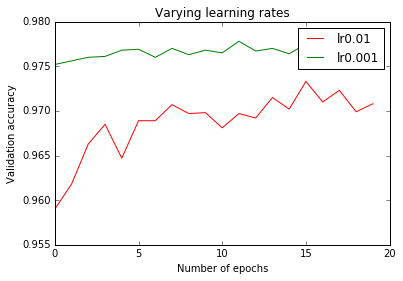

In [156]:
plt.title('Varying learning rates')
plt.xlabel('Number of epochs')
plt.ylabel('Validation accuracy')
plt.plot(lr1['epoch'],lr1['val_acc'],color='red',label='lr0.01')
plt.plot(lr2['epoch'],lr2['val_acc'],color='green',label='lr0.001')
plt.legend()
plt.savefig('Varying learning rates')
plt.show()

In [157]:
plt.title('Varying Number of neurons in hidden layer')
plt.xlabel('Number of epochs')
plt.ylabel('Validation accuracy')
plt.plot(res256['epoch'],res256['val_acc'],color='red',label='256')
plt.plot(res600['epoch'],res600['val_acc'],color='green',label='600')
plt.plot(res800['epoch'],res800['val_acc'],color='blue',label='800')
plt.legend()
plt.savefig('Varying Number of neurons in hidden layer')

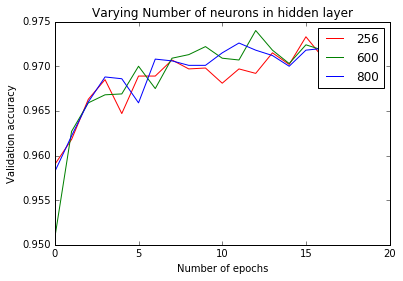

In [158]:
plt.show()

In [153]:
predictions = model.predict(X_test)
predictions.shape

(10000, 10)